In [1]:
# open trump_news_2023.csv
import pandas as pd
import numpy as np

# Read the CSV file
df = pd.read_csv('trump_news_2023.csv')

# Display the first few rows of the DataFrame
print(df.head())

       date                             title                 source  \
0  31.12.23              Trump administration  Associated Press (AP)   
1  31.12.23                Stock market today  Associated Press (AP)   
2  31.12.23                       LeBron doll  Associated Press (AP)   
3  31.12.23  Dominican Republic roof collapse  Associated Press (AP)   
4  31.12.23                      Stamp prices  Associated Press (AP)   

                                                link  
0  https://apnews.com/live/donald-trump-news-upda...  
1  https://apnews.com/article/stocks-markets-tari...  
2  https://apnews.com/article/lebron-james-ken-do...  
3  https://apnews.com/article/dominican-republic-...  
4  https://apnews.com/article/price-of-a-stamp-in...  


In [2]:
# Load date column, convert to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# count the number of articles per month
df['month'] = df['date'].dt.to_period('M')
df['month'] = df['month'].dt.to_timestamp()
# Count the number of articles per month
articles_per_month = df['month'].value_counts().sort_index()

# print the number of articles per month
print("Number of articles per month:")
print(articles_per_month)

Number of articles per month:
month
2022-12-01     132
2023-01-01    1089
2023-02-01     957
2023-03-01    1056
2023-04-01    1023
2023-05-01    1551
2023-06-01    1617
2023-07-01    1056
2023-08-01    1056
2023-09-01    1023
2023-10-01    1056
2023-11-01    1023
2023-12-01    1056
2024-01-01      33
Name: count, dtype: int64


/var/folders/bb/zqgv5k9s16n2s1fjgg4d5mdc0000gn/T/ipykernel_64738/2474781909.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


Number of articles per month for each source:
month                  2022-12-01  2023-01-01  2023-02-01  2023-03-01  \
source                                                                  
ABC News                       10         159          74          79   
Al Jazeera                     17          73          47          97   
Associated Press (AP)          11          96         133         134   
BBC                             0         112          84         139   
CBS News                        2         155          76         149   
FOX News                       20         113         150          77   
NBC                            36         129         107         112   
NPR                            12         100         125         111   
The New York Post               4          40          41          47   
The New York Times             20         112         120         111   

month                  2023-04-01  2023-05-01  2023-06-01  2023-07-01  \
sour

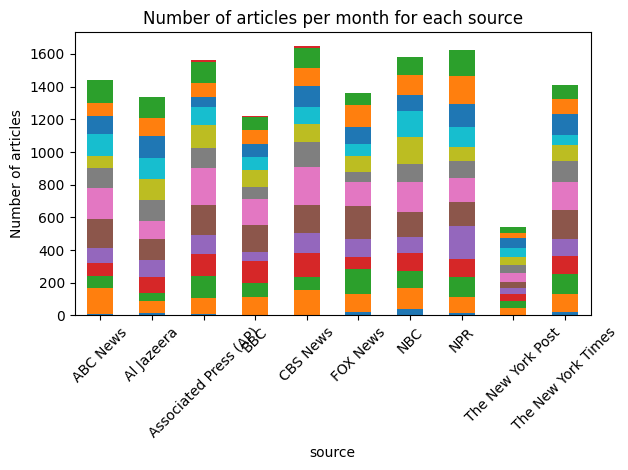

In [8]:
# Count the number of articles per month for each source
articles_per_month_source = df.groupby(['source', 'month']).size().unstack(fill_value=0)
# print the number of articles per month for each source
print("Number of articles per month for each source:")
print(articles_per_month_source)
# Plot the number of articles per month for each source
import matplotlib.pyplot as plt
articles_per_month_source.plot(kind='bar', stacked=True)
plt.title('Number of articles per month for each source')
# plt.xlabel('Month')
plt.ylabel('Number of articles')
plt.xticks(rotation=45)
# plt.legend(title='Source')
plt.tight_layout()
plt.legend([], frameon=False)
plt.show()